# Cross Validation

**Note**: This notebook is derived from Chapter 5: Model Evaluation and Improvement by Müller, Andreas C.; Guido, Sarah. _Introduction to Machine Learning with Python: A Guide for Data Scientists_ (p. 253). O'Reilly Media. Kindle Edition. 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Create a synthetic dataset
X, y = make_blobs(random_state=0)

In [3]:
# Split data and labels into a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
# Instantiate a model 
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
# Evaluate the model
log_reg.score(X_test, y_test)

0.88

### Points to remember:
 - We want to create a model that fits the train data, but can still generalize to out of sample data
 - For this reason, we care more about how the model scores when on test data

## K-Folds CV

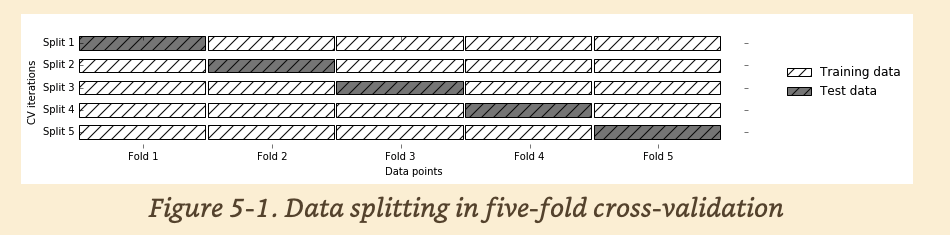

In [6]:
Image("../../assets/images/k-folds.png")

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [8]:
# Load iris dataset
iris = load_iris()

X = iris.data
y = iris.target

In [9]:
# Instantiate logistic regression
log_reg = LogisticRegression()

In [10]:
# Run cross validation
scores = cross_val_score(log_reg, X, y)
print(scores)

[0.96078431 0.92156863 0.95833333]


Note: Default setting is a 3-fold cross validation. Let's change this to CV=5

In [11]:
scores = cross_val_score(log_reg, X, y, cv=5)
print(scores) 

[1.         0.96666667 0.93333333 0.9        1.        ]


Note: The variance of the model is between 90% and 100%. Remember the discussion on the bias-variance tradeoff.

In [12]:
# Compute the mean to get the average CV score
scores.mean() efjngiewjgi

0.9600000000000002

In [13]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


There are two conclusions that we can reach from seeing that we get 90% to 100% accuracy scores. 
1. The model is dependent on particular folds of the split
2. We don't have enough data

We could have gotten lucky on the perfect score folds and unlucky with hard to classify examples on the lower scores.

Note: CV does not return a model when run. It creates a model for each fold but after that, there is no way to call the model since they are built internally.

## Stratified k-Fold CV 

Issues with iris dataset

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

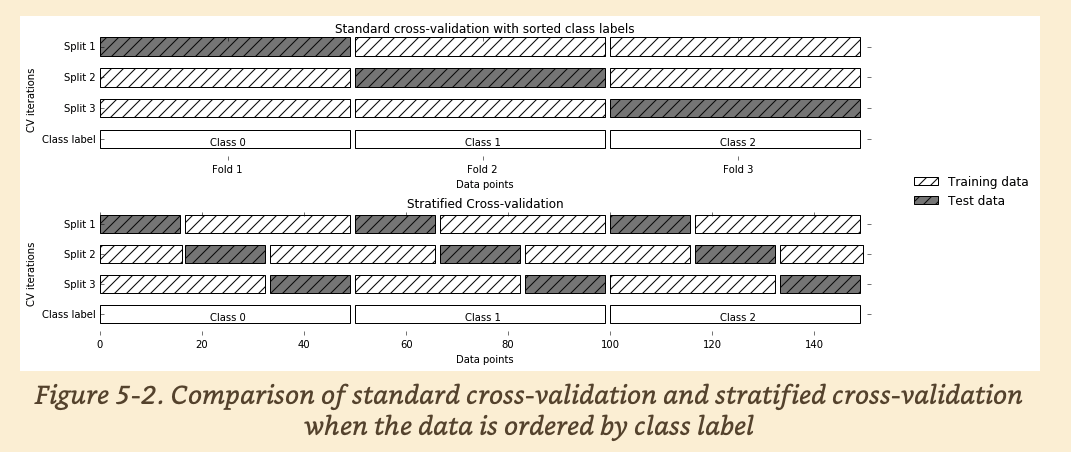

In [15]:
Image("../../assets/images/stratified k-Folds.png")

Normally it is best to use stratified k-folds when using a classifier. This allows us to randomly sample which observations are kept in the training and testing sets.

In [51]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [53]:
cross_val_score(log_reg, X, y, cv=kfold)

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

We have verified that using standard k-folds CV is a terrible idea! Even worse, if we chose the default of 3 folds, look what happens...

In [54]:
kfold = KFold(n_splits=3)
cross_val_score(log_reg, X, y, cv=kfold)

array([0., 0., 0.])

That is a terrible score! 0 for accuracy! Let's see if we can shake things up a bit. This time, we will `stratify` the splits and randomly select which data observations go into each split.

In [55]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(log_reg, X, y, cv=kfold)

array([0.9 , 0.96, 0.96])

## Leave-one-out CV

Great for small datasets because it allows you to pick a single point for the test set, while all the others will be in the training. However, this takes FOREVER to run, so be cautious for large datasets.

In [57]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(log_reg, X, y, cv=loo)

In [58]:
print("Number of CV iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of CV iterations:  150
Mean accuracy: 0.95
